In [63]:
import numpy as np
import pandas as pd

In [64]:
dataset = pd.read_csv('diamond.csv')

In [65]:
dataset

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...,...,...
493,10022694,https://www.brilliantearth.com//loose-diamonds...,Pear,490,0.30,Ideal,F,SI1,GIA,natural,2020-11-29 12-26 PM
494,10048814,https://www.brilliantearth.com//loose-diamonds...,Emerald,490,0.30,Ideal,F,VS2,GIA,natural,2020-11-29 12-26 PM
495,9946120,https://www.brilliantearth.com//loose-diamonds...,Emerald,490,0.34,Ideal,G,SI1,GIA,natural,2020-11-29 12-26 PM
496,10078955,https://www.brilliantearth.com//loose-diamonds...,Pear,490,0.30,Ideal,F,SI2,GIA,natural,2020-11-29 12-26 PM


In [66]:
dataset=dataset.drop(['cut','clarity','report','type','date_fetched','color','url','shape'], axis=1)
dataset
# dataset["shape"] =float(obj.dataset["shape"].replace(r'\s*', np.nan, regex=True))

,id,price,carat
0,10086429,400,0.30
1,10016334,400,0.31
2,9947216,400,0.30
3,10083437,400,0.30
4,9946136,400,0.30
...,...,...,...
493,10022694,490,0.30
494,10048814,490,0.30
495,9946120,490,0.34
496,10078955,490,0.30


In [67]:
X = dataset.iloc[:,:1].values
Y = dataset.iloc[:,1:2].values
print("X X(datatype)", type(X))
print("Y Y(datatype)", type(Y))

X X(datatype) <class 'numpy.ndarray'>
Y Y(datatype) <class 'numpy.ndarray'>


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.76187643],
       [-0.10700169],
       [-0.96376918],
       [ 0.72478843],
       [-0.97715656],
       [ 0.56013606],
       [ 0.7628433 ],
       [ 0.72294147],
       [ 0.81773155],
       [-1.00824503],
       [ 0.37819165],
       [ 0.75786022],
       [ 0.71678079],
       [ 0.74266306],
       [ 0.7758712 ],
       [-0.33188487],
       [ 0.72147877],
       [ 0.74190692],
       [ 0.29545021],
       [-0.0794336 ],
       [ 0.77191696],
       [-1.22024906],
       [ 0.75255485],
       [ 0.66849946],
       [-1.21979042],
       [ 0.73176722],
       [ 0.72253241],
       [-0.69418703],
       [ 0.76144258],
       [-1.00789795],
       [ 0.75074507],
       [ 0.74716271],
       [-0.09051538],
       [-0.07423979],
       [-0.33552921],
       [ 0.72996984],
       [ 0.75231933],
       [-0.97756562],
       [ 0.78156083],
       [-0.99923334],
       [-0.99691534],
       [-0.96696728],
       [-0.96036036],
       [ 0.74355555],
       [-0.71115677],
       [-0

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [72]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# model = Sequential([
#     Dense(32, activation='relu', input_shape=(1,)),
#     Dense(16, activation='relu'),
#     Dense(40, activation='sigmoid'),
# ])

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=64)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 2.3292 - accuracy: 0.0603
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 2.2755 - accuracy: 0.1629
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 2.2351 - accuracy: 0.2366
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 2.1990 - accuracy: 0.2366
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 2.1672 - accuracy: 0.2366
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 2.1372 - accuracy: 0.2366
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 2.1075 - accuracy: 0.2321
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 2.0821 - accuracy: 0.2321
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 2.0626 - accuracy: 0.2344
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 2.0473 - accuracy: 0.2366
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 5ms/step - loss: 1.9975 - accuracy: 0.2545
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9949 - accuracy: 0.2500
Epoch 86/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9947 - accuracy: 0.2500
Epoch 87/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9947 - accuracy: 0.2522
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9945 - accuracy: 0.2500
Epoch 89/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9944 - accuracy: 0.2545
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9947 - accuracy: 0.2522
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9943 - accuracy: 0.2522
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9936 - accuracy: 0.2522
Epoch 93/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9939 - accuracy: 0.2500
Epoch 94/100
7/7 [===============

In [75]:
Y_pred = model.predict(X_test)
pred = list()
for i in range(len(Y_pred)):
    pred.append(np.argmax(Y_pred[i]))
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

In [76]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 22.0


In [77]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100
7/7 [==============================] - 1s 94ms/step - loss: 1.9923 - accuracy: 0.2545 - val_loss: 2.0107 - val_accuracy: 0.2200
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 1.9916 - accuracy: 0.2500 - val_loss: 2.0142 - val_accuracy: 0.2200
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 1.9918 - accuracy: 0.2522 - val_loss: 2.0172 - val_accuracy: 0.2200
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 1.9910 - accuracy: 0.2522 - val_loss: 2.0141 - val_accuracy: 0.2200
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 1.9915 - accuracy: 0.2522 - val_loss: 2.0116 - val_accuracy: 0.2200
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 1.9906 - accuracy: 0.2522 - val_loss: 2.0107 - val_accuracy: 0.2200
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 1.9910 - accuracy: 0.2522 - val_loss: 2.0107 - val_accuracy: 0.2200
Epoch 8/100
7/7 [===

7/7 [==============================] - 0s 32ms/step - loss: 1.9809 - accuracy: 0.2545 - val_loss: 2.0081 - val_accuracy: 0.2200
Epoch 60/100
7/7 [==============================] - 0s 33ms/step - loss: 1.9806 - accuracy: 0.2567 - val_loss: 2.0151 - val_accuracy: 0.2200
Epoch 61/100
7/7 [==============================] - 0s 20ms/step - loss: 1.9804 - accuracy: 0.2500 - val_loss: 2.0174 - val_accuracy: 0.2200
Epoch 62/100
7/7 [==============================] - 0s 18ms/step - loss: 1.9803 - accuracy: 0.2522 - val_loss: 2.0117 - val_accuracy: 0.2200
Epoch 63/100
7/7 [==============================] - 0s 15ms/step - loss: 1.9799 - accuracy: 0.2522 - val_loss: 2.0092 - val_accuracy: 0.2200
Epoch 64/100
7/7 [==============================] - 0s 15ms/step - loss: 1.9798 - accuracy: 0.2522 - val_loss: 2.0121 - val_accuracy: 0.2200
Epoch 65/100
7/7 [==============================] - 0s 18ms/step - loss: 1.9790 - accuracy: 0.2500 - val_loss: 2.0125 - val_accuracy: 0.2200
Epoch 66/100
7/7 [========

In [78]:
history.history

{'loss': [1.9922888278961182,
  1.9915612936019897,
  1.9918283224105835,
  1.9909918308258057,
  1.9914706945419312,
  1.9906342029571533,
  1.9910248517990112,
  1.9902254343032837,
  1.990092158317566,
  1.9898258447647095,
  1.9896239042282104,
  1.9896320104599,
  1.9890927076339722,
  1.9891834259033203,
  1.9886095523834229,
  1.9887964725494385,
  1.9882339239120483,
  1.98831045627594,
  1.9880255460739136,
  1.988081932067871,
  1.9873946905136108,
  1.9877567291259766,
  1.9868223667144775,
  1.9873740673065186,
  1.9865788221359253,
  1.9869276285171509,
  1.9869534969329834,
  1.9866024255752563,
  1.987420916557312,
  1.9863229990005493,
  1.985690951347351,
  1.9853919744491577,
  1.985526442527771,
  1.9851046800613403,
  1.9848304986953735,
  1.9847749471664429,
  1.984629511833191,
  1.9847160577774048,
  1.9853676557540894,
  1.9839189052581787,
  1.984115719795227,
  1.9839446544647217,
  1.9833894968032837,
  1.9840167760849,
  1.9832313060760498,
  1.9830554723739

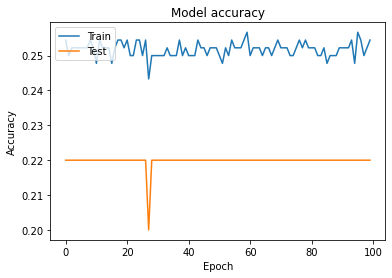

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

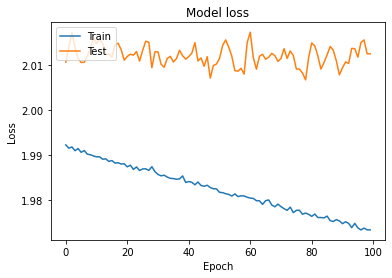

In [80]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()